In [ ]:
import cv2

import numpy as np
img = cv2.imread('datasets/tj_ntest/IMG_10000013f.jpg')

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
img_contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[-2]

img_contours = sorted(img_contours, key=cv2.contourArea)

for i in img_contours:

    if cv2.contourArea(i) > 100:

        break
mask = np.zeros(img.shape[:2], np.uint8)
cv2.drawContours(mask, [i],-1, 255, -1)
new_img = cv2.bitwise_and(img, img, mask=mask)
cv2.imshow("Original Image", img)
cv2.imshow("Image with background removed", new_img)
cv2.waitKey(0)


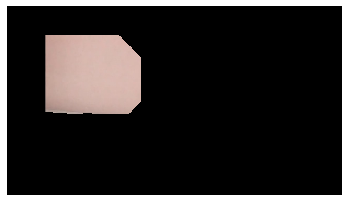

In [1]:
# Load image
import cv2
import numpy as np
from matplotlib import pyplot as plt
# Load image
image_bgr = cv2.imread('datasets/tj_ntest/IMG_10000013f.jpg')
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

rectangle = (0, 56, 256, 150)
# Create initial mask
mask = np.zeros(image_rgb.shape[:2], np.uint8)

# Create temporary arrays used by grabCut
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# Run grabCut
cv2.grabCut(image_rgb, # Our image
            mask, # The Mask
            rectangle, # Our rectangle
            bgdModel, # Temporary array for background
            fgdModel, # Temporary array for background
            5, # Number of iterations
            cv2.GC_INIT_WITH_RECT) # Initiative using our rectangle

# Create mask where sure and likely backgrounds set to 0, otherwise 1
mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')

# Multiply image with new mask to subtract background
image_rgb_nobg = image_rgb * mask_2[:, :, np.newaxis]
plt.imshow(image_rgb_nobg), plt.axis("off")
plt.show()


In [ ]:
import tj2

model, m, X, y = tj2.run_all_transfer(mode = 'naive')
    

In [ ]:
input_shape = (90, 160, 3)
classcount = 5
pixelsize = 255
newX = tj2.prep_X_for_cnn(X, input_shape, pixelsize)
newy = tj2.prep_y_for_cnn(y, classcount)
        
predicted_values = model.predict(newX)
final_prediction = tj2.predicted_class(predicted_values)
tj2.show_metrics(y, final_prediction)

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
pca.fit(X)
print(pca.explained_variance_ratio_)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
#clf = DecisionTreeClassifier(random_state=0)
clf = RandomForestClassifier(max_depth = 2, random_state=0)

newX = pca.transform(X)

clf.fit(newX, y)


In [ ]:
test_file='datasets/tj_test.csv'
test_path='datasets/tj_ntest'
outfile = "tj_submission_rf.csv"
test_X = tj2.read_testing_data_scaled(test_file, test_path)

testX = pca.transform(test_X)

predicted_values = clf.predict(testX)
final_prediction = tj2.predicted_class(predicted_values)
tj2.write_output(outfile, final_prediction, 'emotion')
    

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(newX, y)
pred = clf.predict(newX)
clf.score(newX, y)